In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os

In [3]:
file_path = '/content/drive/My Drive/final_cloth_img.csv'

In [4]:
#file_path = os.path.join('.','final_cloth_img.csv')

In [5]:
#cloth_img=pd.read_csv(file_path)

In [6]:
file_path = '/content/drive/My Drive/final_footwear_img_v2.csv'


In [7]:
footwear_img=pd.read_csv(file_path)

In [8]:

# footwear_img=pd.read_csv('final_footwear_img.csv')

In [9]:
#folder_path=os.path.join('.','images')

In [10]:
folder_path='/content/drive/My Drive/images'

In [11]:
#imgs_df=pd.concat([cloth_img,footwear_img],ignore_index=True)

In [12]:
imgs_df=footwear_img

In [13]:
imgs_df

,id,masterCategory,subCategory,articleType,filename
0,30243,Footwear,Flip Flops,Flip Flops,30243.jpg
1,16987,Footwear,Flip Flops,Flip Flops,16987.jpg
2,17646,Footwear,Flip Flops,Flip Flops,17646.jpg
3,15877,Footwear,Flip Flops,Flip Flops,15877.jpg
4,12981,Footwear,Flip Flops,Flip Flops,12981.jpg
...,...,...,...,...,...
952,7593,Footwear,Shoes,Sports Shoes,7593.jpg
953,35713,Footwear,Shoes,Sports Shoes,35713.jpg
954,4486,Footwear,Shoes,Sports Shoes,4486.jpg
955,12693,Footwear,Shoes,Sports Shoes,12693.jpg


In [14]:

ids_to_drop = [4282,7217,10804]
imgs_df = imgs_df[~imgs_df['id'].isin(ids_to_drop)]


In [15]:
imgs_df['label']=imgs_df['masterCategory']+'_'+imgs_df['subCategory']+'_'+imgs_df['articleType']

<ipython-input-15-011d060e7fc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgs_df['label']=imgs_df['masterCategory']+'_'+imgs_df['subCategory']+'_'+imgs_df['articleType']


In [16]:
imgs_df.head()

,id,masterCategory,subCategory,articleType,filename,label
0,30243,Footwear,Flip Flops,Flip Flops,30243.jpg,Footwear_Flip Flops_Flip Flops
1,16987,Footwear,Flip Flops,Flip Flops,16987.jpg,Footwear_Flip Flops_Flip Flops
2,17646,Footwear,Flip Flops,Flip Flops,17646.jpg,Footwear_Flip Flops_Flip Flops
3,15877,Footwear,Flip Flops,Flip Flops,15877.jpg,Footwear_Flip Flops_Flip Flops
4,12981,Footwear,Flip Flops,Flip Flops,12981.jpg,Footwear_Flip Flops_Flip Flops


In [17]:
imgs_df['label'].unique()


array(['Footwear_Flip Flops_Flip Flops', 'Footwear_Sandal_Sandals',
       'Footwear_Shoes_Casual Shoes', 'Footwear_Shoes_Formal Shoes',
       'Footwear_Shoes_Sports Shoes'], dtype=object)

In [41]:
from sklearn.model_selection import train_test_split

def split_footwear_dataset(df, category_column='label', train_ratio=0.6, val_ratio=0.2, test_ratio=0.19):
    """
    Split a dataset into train, validation, and test sets, ensuring all splits have all categories.

    Args:
    - df: The input DataFrame with a 'category' column.
    - category_column: The name of the column representing categories.
    - train_ratio: Proportion of data for training set.
    - val_ratio: Proportion of data for validation set.
    - test_ratio: Proportion of data for test set.

    Returns:
    - train_df: Training subset.
    - val_df: Validation subset.
    - test_df: Test subset.
    """
    # Step 1: Split into train and temp (val+test)
    train_df, val_df = train_test_split(
        df,
        test_size= test_ratio,
        stratify=df[category_column],
        random_state=42
    )

    # Step 2: Split temp into validation and test
    # val_df, test_df = train_test_split(
    #     temp_df,
    #     test_size=test_ratio / (val_ratio + test_ratio),  # Adjust ratio for the split
    #     stratify=temp_df[category_column],
    #     random_state=42
    # )

    return train_df, val_df

In [42]:
train_df, val_df = split_footwear_dataset(imgs_df)

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [44]:
target_size = (224, 224)

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import numpy as np


In [46]:
from PIL import Image
import numpy as np

def preprocess_images(imgs_df, folder_path, target_size=(224, 224)):
    """
    Preprocess images and labels without TensorFlow.

    Args:
        imgs_df: DataFrame containing image metadata (e.g., filename, category, label).
        folder_path: Root folder containing the images.
        target_size: Tuple specifying the target size of the image (width, height).

    Returns:
        images: Numpy array of preprocessed images.
        labels: List of corresponding labels.
    """
    images = []
    labels = []

    for ind, row in imgs_df.iterrows():
       # try:
            # Build the file path based on the category
            if row['masterCategory'] == 'Apparel':
                file_path = f"{folder_path}/clothing/{row['filename']}"
            elif row['masterCategory'] == 'Footwear':
                file_path = f"{folder_path}/foot wear/{row['filename']}"
            # else:
            #     continue  # Skip rows with other categories

            # # Load the image using Pillow
            #img = Image.open(file_path).convert('RGB')

            # # Resize the image
            # img = img.resize(target_size)

            # # Convert the image to a numpy array
            # img_array = np.asarray(img, dtype=np.float32)

            # # Normalize the image to match ResNet preprocessing
            # img_array /= 255.0  # Scale pixel values to [0, 1]


            # Append the preprocessed image and label
            images.append(file_path)
            labels.append(row['label'])

        # except Exception as e:
        #     print(f"Error processing file {row['id']}: {e}")

    # Convert the list of images to a numpy array
    #images = np.array(images)

    return images, labels


In [47]:
train_images, train_labels = preprocess_images(train_df, folder_path, target_size)
#test_images, test_labels = preprocess_images(test_df, folder_path, target_size)
val_images, val_labels = preprocess_images(val_df, folder_path, target_size)

In [48]:
#test_df.groupby('label').count()

In [49]:
from sklearn.preprocessing import LabelEncoder

# Encode string labels to integers
label_encoder = LabelEncoder()
encoded_labels_train = label_encoder.fit_transform(train_labels)

# label_encoder = LabelEncoder()
# encoded_labels_test = label_encoder.fit_transform(test_labels)

label_encoder = LabelEncoder()
encoded_labels_val = label_encoder.fit_transform(val_labels)

In [50]:
import numpy as np

def create_image_pairs(images, labels, target_pair_count=2000):
    """
    Create at least `target_pair_count` unique pairs of images and their corresponding labels (1 for similar, 0 for dissimilar).

    Args:
    - images: Array of preprocessed images.
    - labels: Array of labels corresponding to the images.
    - target_pair_count: Total number of pairs to generate.

    Returns:
    - pairs: Array of paired images.
    - pair_labels: Array of labels for the pairs (1: similar, 0: dissimilar).
    """
    pairs = []
    pair_labels = []
    unique_labels = np.unique(labels)
    label_indices = {label: np.where(labels == label)[0] for label in unique_labels}

    # Set to track unique pairs (sorted tuples of indices)
    unique_pairs = set()

    # Calculate number of positive and negative pairs
    num_positive_pairs = target_pair_count // 2
    num_negative_pairs = target_pair_count - num_positive_pairs

    # Generate positive pairs
    while len(pairs) < num_positive_pairs:
        for label, indices in label_indices.items():
            if len(indices) < 2:
                continue  # Skip if not enough samples for positive pairs
            i, j = np.random.choice(indices, size=2, replace=False)

            # Create a sorted tuple of indices
            pair = tuple(sorted([i, j]))
            if pair not in unique_pairs:
                pairs.append([images[i], images[j]])
                pair_labels.append(1)
                unique_pairs.add(pair)

            if len(pairs) >= num_positive_pairs:
                break

    # Generate negative pairs
    while len(pairs) < target_pair_count:
        for label, indices in label_indices.items():
            i = np.random.choice(indices)
            neg_label = np.random.choice(unique_labels[unique_labels != label])
            j = np.random.choice(label_indices[neg_label])

            # Create a sorted tuple of indices
            pair = tuple(sorted([i, j]))
            if pair not in unique_pairs:
                pairs.append([images[i], images[j]])
                pair_labels.append(0)
                unique_pairs.add(pair)

            if len(pairs) >= target_pair_count:
                break

    return np.array(pairs), np.array(pair_labels)


In [55]:
pairs_val, pair_labels_val = create_image_pairs(val_images, encoded_labels_val, target_pair_count=6200)
print(f"Number of pairs: {len(pairs_val)}")
print(f"Pair labels distribution: {np.unique(pair_labels_val, return_counts=True)}")

Number of pairs: 6200
Pair labels distribution: (array([0, 1]), array([3100, 3100]))


In [69]:
# Assuming `images` is a numpy array of preprocessed images and `labels` is a numpy array of their labels
pairs_train, pair_labels_train = create_image_pairs(train_images, encoded_labels_train, target_pair_count=20000)
print(f"Number of pairs: {len(pairs_train)}")
print(f"Pair labels distribution: {np.unique(pair_labels_train, return_counts=True)}")

# pairs_test, pair_labels_test = create_image_pairs(test_images, encoded_labels_test, target_pair_count=3000)
# print(f"Number of pairs: {len(pairs_test)}")
# print(f"Pair labels distribution: {np.unique(pair_labels_test, return_counts=True)}")



Number of pairs: 20000
Pair labels distribution: (array([0, 1]), array([10000, 10000]))


In [57]:
class ProductDataset(Dataset):
    def __init__(self, pairs, labels, transform=None):
        self.pairs = pairs
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img1_path, img2_path = self.pairs[idx]
        label = self.labels[idx]

        img1 = Image.open(img1_path).convert('RGB')
        img2 = Image.open(img2_path).convert('RGB')

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        return img1, img2, torch.tensor(label, dtype=torch.float32)


In [58]:
class FeatureExtractor(nn.Module):
    def __init__(self, embedding_dim=512):
        super(FeatureExtractor, self).__init__()
        #resnet = models.resnet50(pretrained=True)
        mobilenet = models.mobilenet_v2(pretrained=True)

        # Freeze all layers initially
        # for param in resnet.parameters():
        #     param.requires_grad = False
        for param in mobilenet.parameters():
            param.requires_grad = False

        # Unfreeze the last convolutional block (layer4)
        # for param in resnet.layer3.parameters():
        #     param.requires_grad = True
        # for param in resnet.layer4.parameters():
        #     param.requires_grad = True
        for param in mobilenet.features[-4:].parameters():  # Adjust the number as needed
            param.requires_grad = True

        # Keep all layers except the final fully connected layer
        # self.feature_extractor = nn.Sequential(*list(resnet.children())[:-1])

        # self.fc = nn.Linear(resnet.fc.in_features, embedding_dim)
        # self.relu = nn.ReLU()
        self.feature_extractor = nn.Sequential(*list(mobilenet.features.children()))
        self.avgpool =nn.AdaptiveAvgPool2d((1, 1))  # Global average pooling
        self.fc = nn.Linear(mobilenet.last_channel, embedding_dim)
        self.relu = nn.ReLU()


    def forward(self, x):
        # Pass through ResNet and flatten the output
        x = self.feature_extractor(x)  # Output shape: [batch_size, 2048, 1, 1]
        #x = x.view(x.size(0), -1)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)                            # [batch_size, embedding_dim]
        x = self.relu(x)     # Flatten to shape: [batch_size, 2048]
        return x

In [59]:
# class AttentionModule(nn.Module):
#     def __init__(self, embedding_dim):
#         super(AttentionModule, self).__init__()
#         self.attention = nn.Sequential(
#             nn.Linear(embedding_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, 1),
#             nn.Softmax(dim=-1)
#         )

#     def forward(self, x):
#         attention_weights = self.attention(x)
#         return x * attention_weights

class SiameseNetwork(nn.Module):
    def __init__(self, feature_extractor):
        super(SiameseNetwork, self).__init__()
        self.feature_extractor = feature_extractor  # Pretrained ResNet50 as feature extractor

    def forward(self, img1, img2):
        # Extract embeddings
        embedding1 = self.feature_extractor(img1)  # [batch_size, embedding_dim]
        embedding2 = self.feature_extractor(img2)  # [batch_size, embedding_dim]
        return embedding1, embedding2


In [60]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, embedding1, embedding2, label):
        # Compute pairwise distance
        distance = torch.nn.functional.pairwise_distance(embedding1, embedding2, p=2)
        # Contrastive loss formula
        loss = label * torch.pow(distance, 2) + (1 - label) * torch.pow(torch.clamp(self.margin - distance, min=0), 2)
        return loss.mean()


In [70]:
# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
     transforms.RandomHorizontalFlip(),      # Randomly flip images horizontally
    transforms.RandomRotation(10),          # Randomly rotate images by ±10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Randomly change brightness, contrast, etc.
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Split pairs into train, validation, and test sets
#pairs, labels = ...  # Load or prepare your image pairs and labels here
# train_pairs, test_pairs, train_labels, test_labels = train_test_split(pairs,pair_labels, test_size=0.2, random_state=42)
# train_pairs, val_pairs, train_labels, val_labels = train_test_split(train_pairs, train_labels, test_size=0.25, random_state=42)

# Datasets and DataLoaders
train_dataset = ProductDataset(pairs_train, pair_labels_train, transform=transform)
val_dataset = ProductDataset(pairs_val, pair_labels_val, transform=transform)
#test_dataset = ProductDataset(pairs_test, pair_labels_test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
#test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [71]:
# Convert numpy arrays to tuples for compatibility with sets
train_pairs_set = set([tuple(pair) for pair in pairs_train])
val_pairs_set = set([tuple(pair) for pair in pairs_val])
#test_pairs_set = set([tuple(pair) for pair in pairs_test])

# Check overlaps
#overlap_with_train = len(test_pairs_set.intersection(train_pairs_set))
overlap_with_val = len(train_pairs_set.intersection(val_pairs_set))

#print(f"Overlap with Training Set: {overlap_with_train}")
print(f"Overlap with Validation Set: {overlap_with_val}")

Overlap with Validation Set: 0


In [72]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize models
feature_extractor = FeatureExtractor()
siamese_network = SiameseNetwork(feature_extractor).to(device)
#feature_extractor = FeatureExtractor().to(device)
#siamese_network = SiameseNetwork(feature_extractor,embedding_dim=2048).to(device)

# Loss function and optimizer
trainable_params = list(filter(lambda p: p.requires_grad, siamese_network.parameters()))
optimizer = optim.Adam(trainable_params, lr=1e-4)
criterion = ContrastiveLoss(margin=1.0)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [73]:
# # Load pretrained MobileNetV2 as feature extractor
# feature_extractor = models.mobilenet_v2(pretrained=True)
# feature_extractor = nn.Sequential(*list(feature_extractor.children())[:-1])  # Remove classifier
# embedding_dim = 1280  # MobileNetV2 output size
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Initialize Siamese Network
# siamese_network = SiameseNetwork(feature_extractor, embedding_dim).to(device)

# # Loss and Optimizer
# criterion = nn.BCELoss()
# optimizer = optim.Adam(siamese_network.parameters(), lr=0.001, weight_decay=1e-4)




In [74]:
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
from itertools import combinations
import random
import copy
from tqdm import tqdm
import pickle

In [66]:
wts=[]

In [75]:
epochs = 5
train_losses, val_losses = [], []

for epoch in range(epochs):
    # Training
    siamese_network.train()
    train_loss = 0.0
    for img1, img2, labels in train_loader:
        img1, img2, labels = img1.to(device), img2.to(device), labels.to(device)

        embedding1, embedding2 = siamese_network(img1, img2)
        loss = criterion(embedding1, embedding2, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    wts.append(copy.deepcopy(siamese_network.state_dict()))

    # Validation
    siamese_network.eval()
    val_loss = 0.0
    with torch.no_grad():
        for img1, img2, labels in val_loader:
            img1, img2, labels = img1.to(device), img2.to(device), labels.to(device)
            embedding1, embedding2 = siamese_network(img1, img2)
            loss = criterion(embedding1, embedding2, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


Epoch 1/5, Train Loss: 0.2733, Val Loss: 0.1264
Epoch 2/5, Train Loss: 0.0885, Val Loss: 0.1137
Epoch 3/5, Train Loss: 0.0542, Val Loss: 0.1199
Epoch 4/5, Train Loss: 0.0349, Val Loss: 0.1113
Epoch 5/5, Train Loss: 0.0228, Val Loss: 0.1164


In [ ]:
# Save the model's state_dict
#torch.save(siamese_network.state_dict(), "siamese_network.pth")


In [77]:
len(wts)

5

In [78]:
siamese_network.load_state_dict(wts[1])
torch.save(siamese_network.state_dict(), 'siamese_network_best.pth')

In [79]:
import torch

def calculate_accuracy(model, dataloader, threshold=0.5):
    """
    Calculates the accuracy of a Siamese Network model.

    Args:
        model: Trained Siamese Neural Network model.
        dataloader: DataLoader containing test or validation data (pairs and labels).
        threshold: Distance threshold to classify pairs as similar or dissimilar.

    Returns:
        Accuracy of the model.
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for img1, img2, labels in dataloader:
            img1, img2, labels = img1.to(device), img2.to(device), labels.to(device)

            # Get embeddings for both images
            embedding1, embedding2 = model(img1, img2)

            # Calculate Euclidean distance
            distances = torch.nn.functional.pairwise_distance(embedding1, embedding2)

            # Predict labels based on the threshold
            predictions = (distances < threshold).float()

            # Compare predictions with actual labels
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    # Calculate accuracy
    accuracy = correct / total
    return accuracy

# Example usage
accuracy = calculate_accuracy(siamese_network, val_loader, threshold=0.5)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 85.34%


In [ ]:
#best_model_wts = copy.deepcopy(siamese_network.state_dict())


In [80]:
class SingleImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        """
        Args:
            image_paths (List[str]): List of image file paths.
            transform (callable, optional): Transformations to apply to images.
        """
        #file_path = f"{folder_path}/foot wear/{row['filename']}"
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):

        file_path = f"{folder_path}/foot wear/{self.image_paths[idx]}"

        img_path = file_path
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, img_path  # Returning img_path for reference


In [81]:
# Combine all image paths from training, validation, and test sets
all_image_paths = train_df['filename'].tolist() + val_df['filename'].tolist()
# Create the dataset
single_image_dataset = SingleImageDataset(all_image_paths, transform=transform)

# Create the DataLoader
single_image_loader = DataLoader(single_image_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)


In [82]:
def compute_all_embeddings(model, dataloader, device):
    """
    Compute embeddings for all images in the dataloader.

    Args:
        model (nn.Module): Trained Siamese Network model.
        dataloader (DataLoader): DataLoader for single images.
        device (torch.device): Device to perform computations on.

    Returns:
        Tuple[np.ndarray, List[str]]: Array of embeddings and corresponding image paths.
    """
    model.eval()
    all_embeddings = []
    all_image_paths = []

    with torch.no_grad():
        for images, img_paths in tqdm(dataloader, desc="Computing Embeddings"):
            images = images.to(device)
            embeddings = model.feature_extractor(images)  # Obtain embeddings
            embeddings = embeddings.cpu().numpy()
            all_embeddings.append(embeddings)
            all_image_paths.extend(img_paths)

    all_embeddings = np.vstack(all_embeddings)
    return all_embeddings, all_image_paths

# Compute embeddings
all_embeddings, all_image_paths_ref = compute_all_embeddings(siamese_network, single_image_loader, device)
print(f"Computed embeddings for {len(all_image_paths_ref)} images.")


Computing Embeddings: 100%|██████████| 30/30 [00:28<00:00,  1.07it/s]

Computed embeddings for 954 images.


In [83]:
# Initialize the NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')  # 6 to exclude the query image itself

# Fit the model on all embeddings
nn_model.fit(all_embeddings)

print("NearestNeighbors model built and fitted on embeddings.")


NearestNeighbors model built and fitted on embeddings.


In [84]:
def recommend_similar_images(query_image_path, model, nn_model, embeddings, image_paths, top_k=5, transform=None):
    """
    Recommend top_k similar images to the given query image.

    Args:
        query_image_path (str): Path to the query image.
        model (nn.Module): Trained Siamese Network model.
        nn_model (NearestNeighbors): Fitted NearestNeighbors model.
        embeddings (np.ndarray): Array of all image embeddings.
        image_paths (List[str]): List of all image paths corresponding to embeddings.
        top_k (int): Number of similar images to recommend.
        transform (callable, optional): Transformations to apply to the query image.

    Returns:
        List[str]: List of recommended image paths.
    """
    from PIL import Image

    # Load and preprocess the query image
    image = Image.open(query_image_path).convert('RGB')

    if transform:
        image = transform(image).unsqueeze(0)  # Add batch dimension
    else:
        raise ValueError("Transformations must be provided.")

    # Move image to the appropriate device
    image = image.to(device)

    with torch.no_grad():
        embedding = model.feature_extractor(image)
        embedding = embedding.cpu().numpy()

    # Find nearest neighbors
    distances, indices = nn_model.kneighbors(embedding, n_neighbors=top_k + 1)  # +1 to exclude the query itself

    # Get recommended image paths, excluding the query image
    recommended_indices = indices[0][1:]
    recommended_images = [image_paths[idx] for idx in recommended_indices]

    return recommended_images


Recommended Images:
/content/drive/My Drive/images/foot wear/39978.jpg
/content/drive/My Drive/images/foot wear/49061.jpg
/content/drive/My Drive/images/foot wear/12724.jpg
/content/drive/My Drive/images/foot wear/21744.jpg
/content/drive/My Drive/images/foot wear/13361.jpg


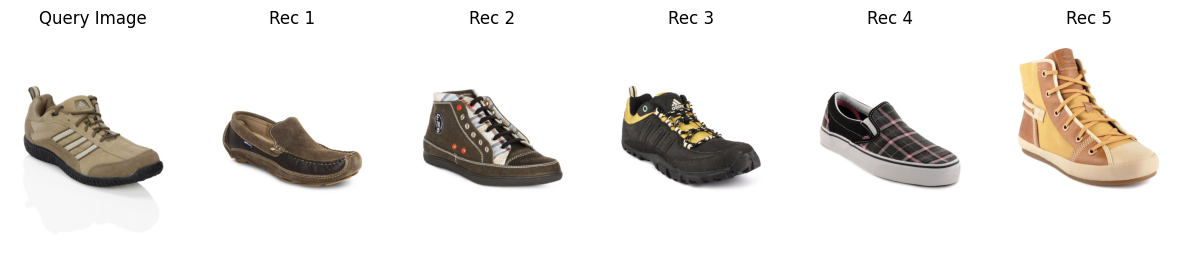

In [85]:
def display_recommendations(query_image_path, recommended_images, transform=None):
    """
    Display the query image and its recommended similar images.

    Args:
        query_image_path (str): Path to the query image.
        recommended_images (List[str]): List of recommended image paths.
        transform (callable, optional): Transformations applied to images.
    """
    plt.figure(figsize=(15, 5))

    # Display Query Image
    plt.subplot(1, 6, 1)
    query_img = Image.open(query_image_path).convert('RGB')
    plt.imshow(query_img)
    plt.title("Query Image")
    plt.axis('off')

    # Display Recommended Images
    for i, rec_img_path in enumerate(recommended_images):
        plt.subplot(1, 6, i + 2)
        rec_img = Image.open(rec_img_path).convert('RGB')
        plt.imshow(rec_img)
        plt.title(f"Rec {i+1}")
        plt.axis('off')

    plt.show()

# Example Usage
query_image = train_df['filename'].iloc[0]
query_image=file_path = f"{folder_path}/foot wear/{query_image}"  # Replace with your desired query image path
recommended_images = recommend_similar_images(
    query_image_path=query_image,
    model=siamese_network,
    nn_model=nn_model,
    embeddings=all_embeddings,
    image_paths=all_image_paths_ref,
    top_k=5,
    transform=transform
)

print("Recommended Images:")
for img in recommended_images:
    print(img)

# Display the recommendations
display_recommendations(query_image, recommended_images, transform=transform)


In [86]:

print(train_df.iloc[0])

id                                      34828
masterCategory                       Footwear
subCategory                             Shoes
articleType                      Casual Shoes
filename                            34828.jpg
label             Footwear_Shoes_Casual Shoes
Name: 446, dtype: object


In [87]:
ids=[39978,49061,12724,21744,13361]
res=imgs_df[imgs_df['id'].isin(ids)]
res

,id,masterCategory,subCategory,articleType,filename,label
388,21744,Footwear,Shoes,Casual Shoes,21744.jpg,Footwear_Shoes_Casual Shoes
495,39978,Footwear,Shoes,Casual Shoes,39978.jpg,Footwear_Shoes_Casual Shoes
519,13361,Footwear,Shoes,Casual Shoes,13361.jpg,Footwear_Shoes_Casual Shoes
533,12724,Footwear,Shoes,Casual Shoes,12724.jpg,Footwear_Shoes_Casual Shoes
553,49061,Footwear,Shoes,Casual Shoes,49061.jpg,Footwear_Shoes_Casual Shoes
